# Binary Image Segmentation

Binary image segmentation is a fundamental task in computer vision where the goal is to partition an image into two classes: foreground (object of interest) and background. This technique is crucial in medical imaging (e.g., tumor detection), autonomous driving (e.g., lane detection), and document processing. The output of binary segmentation is typically a mask—a binary image where pixels belonging to the object are labeled as 1, and background pixels as 0.

Modern approaches often utilize convolutional neural networks (CNNs), particularly encoder-decoder architectures like U-Net, which was specifically designed for biomedical image segmentation. U-Net's architecture enables precise localization by combining high-resolution features from the contracting path with contextual information from the expansive path, making it highly effective for binary segmentation tasks (Ronneberger et al., 2015).

https://arxiv.org/abs/1505.04597

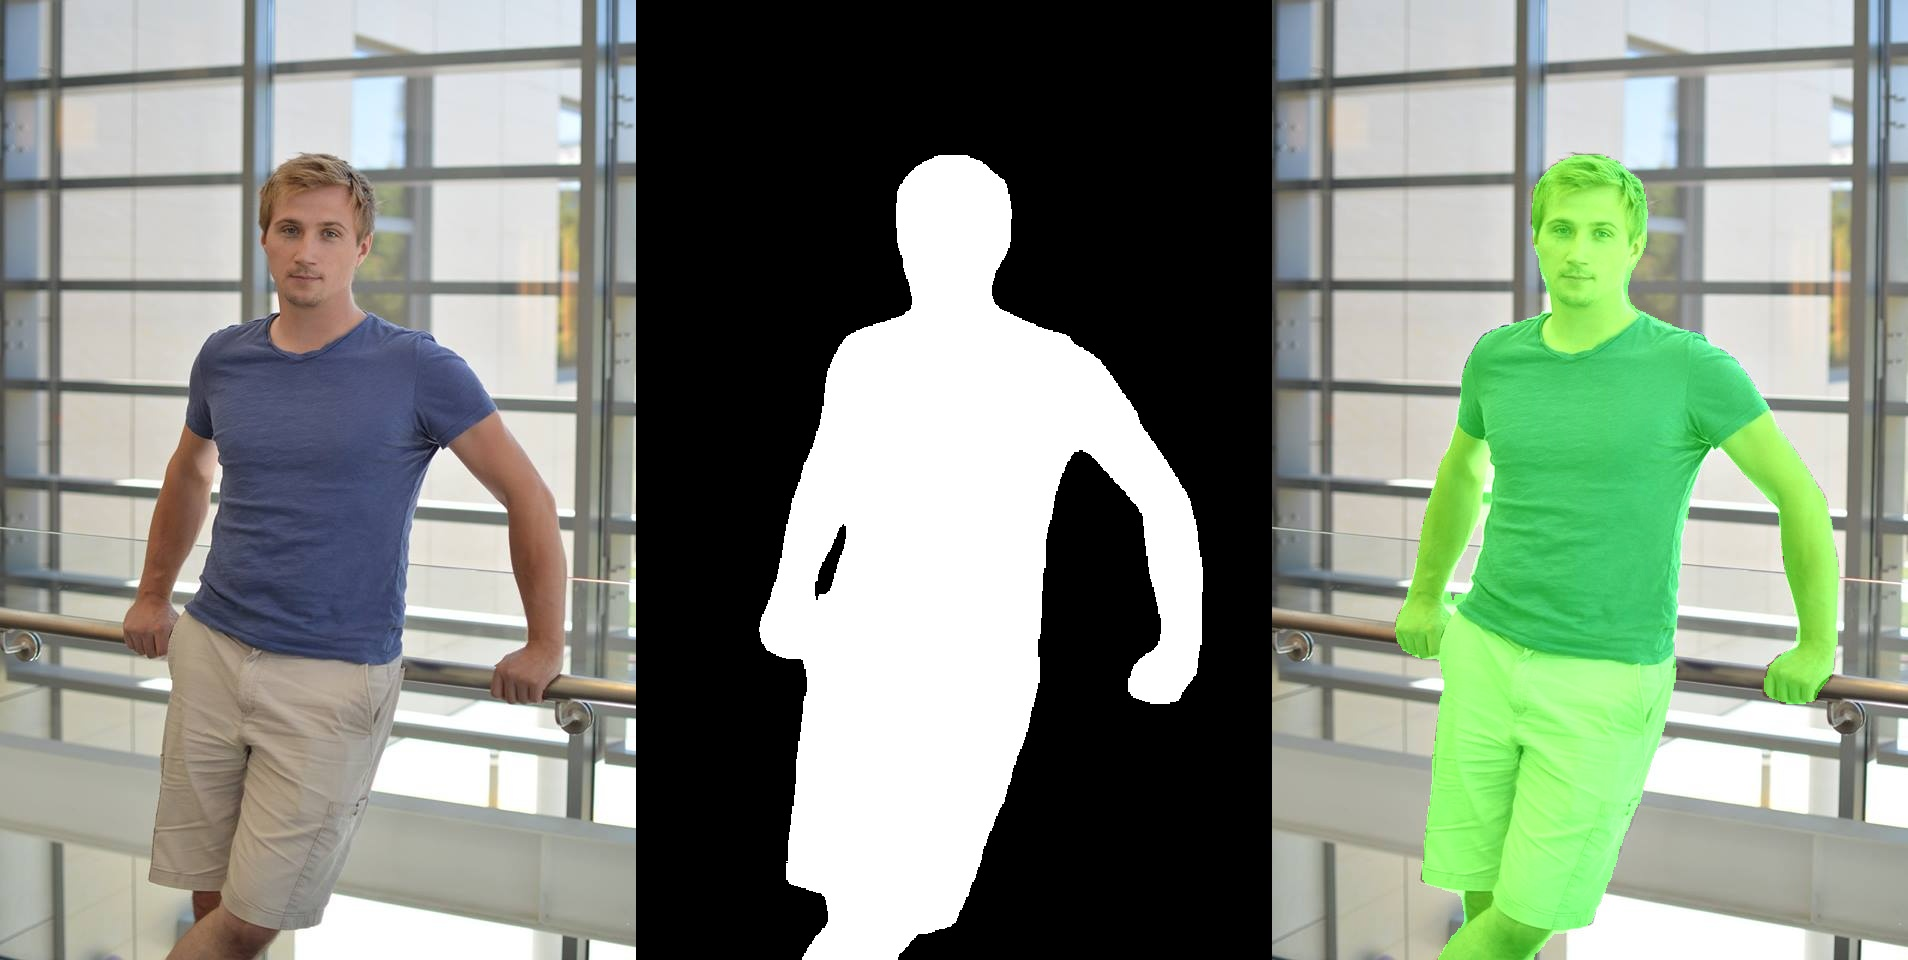

image from : https://pypi.org/project/people-segmentation/

### Common Techniques

1.  **Thresholding:**

    * This is the simplest segmentation technique. It involves selecting a threshold value, and pixels with intensity values above the threshold are classified as foreground, while those below are classified as background.
    * **Types:**
        * **Global Thresholding:** A single threshold value is used for the entire image.
        * **Adaptive Thresholding:** The threshold value varies across different regions of the image, based on local pixel intensities.
    * **Example (using OpenCV):**

In [ ]:
!wget -O cat.jpg https://images.unsplash.com/photo-1573865526739-10659fec78a5

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)  # Replace 'image.jpg' with your image path

# Global Thresholding
_, thresh_global = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
thresh_adaptive = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(thresh_global, cmap='gray'), plt.title('Global Thresholding')
plt.subplot(1, 3, 3), plt.imshow(thresh_adaptive, cmap='gray'), plt.title('Adaptive Thresholding')
plt.show()

2.  **Edge Detection:**

    * Edge detection techniques identify boundaries between objects in an image by detecting sharp changes in pixel intensity.
    * **Common Operators:**
        * **Sobel Operator:** Computes the gradient of the image intensity function.
        * **Canny Edge Detector:** A multi-stage algorithm that detects a wide range of edges.
    * **Example (using OpenCV):**

In [ ]:
# Canny Edge Detection
edges = cv2.Canny(image, 100, 200)  # Apply Canny edge detection

plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray'), plt.title('Canny Edges')
plt.show()

3.  **Region Growing:**

    * Region growing techniques group pixels with similar characteristics (e.g., intensity, color) into regions.
    * The algorithm starts with a "seed" pixel and iteratively adds neighboring pixels to the region if they meet a certain criterion.

### Advantages and Disadvantages

* **Advantages:**
    * Simple and computationally efficient (especially thresholding).
    * Effective for images with clear contrast between foreground and background.
* **Disadvantages:**
    * Sensitive to noise and illumination variations.
    * Difficult to handle complex scenes with overlapping objects.
    * Lack of semantic understanding; segmentation is based on low-level features.

### Evaluation Metrics

To evaluate the performance of segmentation algorithms, we use metrics such as:

1.  **Intersection over Union (IoU):**

    * Also known as the Jaccard Index, IoU measures the overlap between the predicted segmentation and the ground truth segmentation.
    * IoU = (Area of Intersection) / (Area of Union)
    * A higher IoU indicates better segmentation performance.

2.  **Dice Coefficient:**

    * Similar to IoU, the Dice coefficient measures the overlap between two segmentations.
    * Dice Coefficient = 2 \* (Area of Intersection) / (Area of Predicted + Area of Ground Truth)
    * Ranges from 0 to 1, with 1 indicating perfect overlap.

These metrics provide a quantitative way to assess the accuracy of our segmentation results.
"""

# Foundation Models and Why

Foundation models represent a transformative shift in artificial intelligence. These models are large-scale neural networks trained on vast and diverse datasets, often using self-supervised learning. Once trained, they can be adapted—or fine-tuned—to a wide range of downstream tasks with minimal additional training data or even in zero-shot or few-shot settings. This versatility has made them particularly impactful across domains such as natural language processing (e.g., GPT, BERT), vision (e.g., CLIP, SAM), and multi-modal tasks.

Traditional deep learning models are typically task-specific. For example, in image segmentation, models like U-Net or DeepLab are trained on a labeled dataset specific to that task (e.g., lung CT scans). These models perform well but require large amounts of annotated data for each new task or domain. Moreover, if the task or input distribution changes, a new model may need to be trained from scratch or extensively fine-tuned.


In contrast, foundation models (e.g., Vision Transformers, CLIP, SAM) are pretrained on broad and diverse datasets that span multiple domains. This extensive pretraining allows them to learn rich, general-purpose representations of data. A key characteristic of foundation models is their transferability—they can be quickly adapted to new tasks with minimal labeled data. For instance, Meta AI's Segment Anything Model (SAM) is a foundation model for segmentation that can segment any object in an image given just a prompt (like a point, box, or mask), without retraining.

https://arxiv.org/pdf/2304.02643

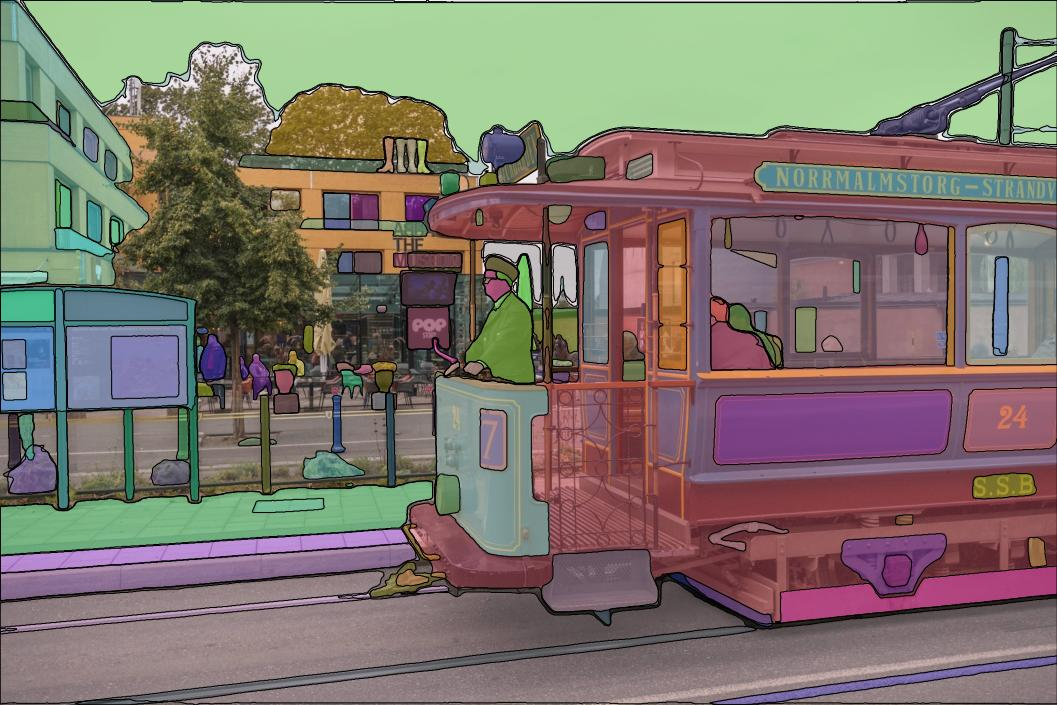

image from: https://github.com/facebookresearch/segment-anything

**The Significance of Foundation Models:**

The emergence of foundation models has several profound implications for the development and application of AI:

* **Reduced Data Requirements:** By learning general-purpose representations, foundation models significantly reduce the need for large amounts of task-specific labeled data, which can be costly and time-consuming to acquire.
* **Improved Generalization and Robustness:** The broad pre-training helps foundation models generalize better to new, unseen data and makes them more robust to variations and noise in the input.
* **Faster Development Cycles:** The ability to adapt a single foundation model to multiple tasks accelerates the development of new AI applications. Developers can leverage the pre-trained knowledge instead of starting from scratch for each new problem.


# CLIP

CLIP is a pre-trained model for telling you how well a given image and a given text caption fit together, introduced by the paper “Learning Transferrable Visual Models from Natural Language Supervision” (2021) from OpenAI. It was trained contrastively on a huge amount (400 million) of web scraped data of image-caption pairs.

During training, the model requires that a huge batch of image-text pairs is fed at once (e.g., 20,000 pairs). That way, each batch contains 20,000*20,000 = 400,000,000 possible pairs, with only 20,000 being correct pairs. For efficient processing, the similarity scores of all possible pairs are computed at once to yield a 20,000 by 20,000 matrix, with the values in the diagonal being the similarity scores for the correct image-text pairs. That way, the objective function can have the goal to maximize the scores in the diagonal and minimize all the scores not in the diagonal.
https://arxiv.org/pdf/2103.00020


image.png

pip install git+https://github.com/openai/CLIP.git

In [ ]:
!pip install git+https://github.com/openai/CLIP.git

In [ ]:
!wget -O dog.jpg https://images.unsplash.com/photo-1518717758536-85ae29035b6d

In [ ]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)

image = clip_preprocess(Image.open("dog.jpg")).unsqueeze(0).to(device)
titles = ["a diagram", "a dog", "a cat"]
text = clip.tokenize(titles).to(device)

with torch.no_grad():
    image_features = clip_model.encode_image(image)
    text_features = clip_model.encode_text(text)

    logits_per_image, logits_per_text = clip_model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)
print(f'The image is best represented by the text: {titles[torch.argmax(logits_per_image.softmax(dim=-1))]}')

In [ ]:
import os
import clip
import torch
from torchvision.datasets import CIFAR100
import matplotlib.pyplot as plt

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)

# Download the dataset
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

# Prepare the inputs
image_index = 3691  # random index of an image 0-9999
image, class_id = cifar100[image_index]
true_class = cifar100.classes[class_id]  # Get the true class name

# Create a copy of the original image before preprocessing (for visualization)
original_image = image

# Preprocess image for CLIP
image_input = clip_preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)

# Calculate features
with torch.no_grad():
    image_features = clip_model.encode_image(image_input)
    text_features = clip_model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Create a figure with two subplots: one for the image and one for the predictions
plt.figure(figsize=(12, 6))

# Plot the image on the left
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title(f"CIFAR100 Image #{image_index}\nTrue class: {true_class}")
plt.axis('off')

# Plot the predictions on the right
plt.subplot(1, 2, 2)
# Create a horizontal bar chart
classes = [cifar100.classes[idx] for idx in indices]
percentages = [100 * val.item() for val in values]
y_pos = range(len(classes))

# Reverse the order to have highest prediction at the top
classes.reverse()
percentages.reverse()

bars = plt.barh(y_pos, percentages, align='center')
plt.yticks(y_pos, classes)
plt.xlabel('Confidence (%)')
plt.title('Top 5 CLIP Predictions')

# Add percentage labels to the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{percentages[i]:.2f}%', va='center')

# Highlight the correct class if it's in the top 5
if true_class in classes:
    idx = classes.index(true_class)
    bars[idx].set_color('green')

plt.tight_layout()
plt.savefig('clip_prediction.png')  # Save the visualization to a file
plt.show()

# Also print the result to console
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")

# clipseg

CLIPSeg is a cutting-edge image segmentation model that distinguishes itself by its "zero-shot" capabilities. This means it can accurately identify and isolate objects or regions within an image based solely on textual descriptions, without requiring prior training on specific segmentation masks. It leverages the power of the CLIP (Contrastive Language–Image Pre-training) model, which has been trained to understand the relationship between images and text.

At its core, CLIPSeg builds upon the foundation of CLIP by adding a lightweight decoder network. This decoder takes the image embeddings produced by CLIP and generates precise segmentation masks. The model effectively interprets textual prompts, using the CLIP text encoder, to pinpoint the corresponding visual elements within an image. This alignment of textual and visual understanding allows for remarkable flexibility in segmentation tasks.

The significance of CLIPSeg lies in its adaptability and efficiency. Its ability to perform segmentation based on arbitrary text prompts opens up a wide range of applications, particularly in scenarios where traditional, data-intensive segmentation methods are impractical. From medical imaging to autonomous driving and agricultural analysis, CLIPSeg offers a powerful tool for rapid and accurate object identification.

image.png

https://arxiv.org/pdf/2112.10003

Basically, the authors extracted the attention layers from CLIP and used them as an input for their own model. Then they trained their own backbone on 240000 image-mask pair so the model can perform binary segmentation. During the training phase, the base CLIP model was completely frozen and was not trained or fine-tuned.

Screenshot from 2025-04-29 14-42-00.png

CLIPSeg doesn't just magically segment based on text. It has a specific way of processing images and text to achieve this remarkable feat. Let's explore its inner workings in more detail.

**1. Architectural Variations:**

It's important to know that the exact way CLIPSeg is built can vary. The original CLIPSeg model introduced in the research paper has its own specific design, and there might be other adaptations or improvements developed by different researchers or in various implementations. Generally, these models build upon the core CLIP encoders but add specialized components for generating the segmentation mask.

**2. Leveraging CLIP's Feature Extraction:**

CLIP has powerful image and text encoders that have learned to understand the relationship between visual concepts and their textual descriptions. CLIPSeg cleverly utilizes the image features extracted by CLIP's image encoder. Often, it doesn't just use the final image embedding from CLIP but also accesses intermediate feature maps from different layers of the encoder. These intermediate features capture visual information at various levels of detail – from high-level semantic information down to more fine-grained spatial details. CLIPSeg can then use this rich set of visual features to perform more accurate segmentation.

**3. Integrating Text Information:**

The text prompt you provide is also crucial. CLIPSeg uses CLIP's text encoder to convert your text into a text embedding, which is a numerical representation of the meaning of your prompt. This text embedding acts as a guide for the segmentation process. The way this text embedding is combined with the visual features from the image encoder is a key part of CLIPSeg's architecture. Different models might use different techniques to fuse this information. For example, some might use attention mechanisms that allow the text embedding to highlight the relevant visual features in the image.

**4. The Segmentation Module (Decoder):**

After the visual features from the image and the textual features from the prompt are processed and combined, CLIPSeg uses an additional module to actually generate the segmentation mask. This module, often referred to as a decoder, takes the combined information and produces a pixel-level prediction of which areas in the image correspond to your text prompt.


**5. Generating the Segmentation Mask:**

The output of the segmentation module is typically a probability map. For each pixel in the image, this map indicates the likelihood that the pixel belongs to the object or region described by your text prompt. To get a final binary segmentation mask (where each pixel is either foreground or background), a threshold is often applied to this probability map. Pixels with a probability above the threshold are considered part of the segmentation, while those below are not. The choice of this threshold can influence the final segmentation result.

In essence, CLIPSeg uses CLIP's powerful understanding of visual and textual concepts and adds a specialized mechanism to locate and highlight the image regions that align with the meaning of your text prompt. The specific architectural choices in how the visual and textual information is combined and how the segmentation mask is generated are what differentiate various CLIPSeg implementations.


# Install clipseg

Clipseg is available as part of the transformers library on HuggingFace.

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git --quiet

Lets load an image we can use for our example

In [ ]:
from PIL import Image
import requests

url = "https://github.com/timojl/clipseg/blob/master/example_image.jpg?raw=true"
image = Image.open(requests.get(url, stream=True).raw)
image

Clipseg has different pretrained checkpoints. We can load the model using one of the chechpoints from Huggingface.

In [ ]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

Before using the model, we need to preprocess the image and our prompts using Clip's image and text encoders. The model comes with a processor pipeline that can handle this job. For each prompt, you will get a different output.

In [ ]:
prompts = ["a glass", "something to fill", "wood", "a jar"]

inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

In [ ]:
import torch
import matplotlib.pyplot as plt

# predict
with torch.no_grad():
  outputs = model(**inputs)

preds = outputs.logits.unsqueeze(1)

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(len(prompts))];
[ax[i+1].text(0, -15, prompts[i]) for i in range(len(prompts))];

# Creating a binary mask from the output
We can use a threshold on the output of clipseg model to turn the probability map into a binray mask

In [ ]:
# here we save the second mask
filename = f"mask.png"
# set i to the index of your prompt
i = 0
plt.imsave(filename,torch.sigmoid(preds[i][0]))

In [ ]:
import cv2

img2 = cv2.imread(filename)

gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

(thresh, bw_image) = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)

# fix color format
cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB)

Image.fromarray(bw_image)